## Importing Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [21]:
df = pd.read_csv('/workspaces/Petrophysics-Python-Series/Data_JA/Data_V2_Norm.CSV')

In [22]:
df.describe()

,DEPTH,GR_norm,PEF,PHIA,PHIE,PHIN_norm,RHOB_norm,RoMS,RT,SwIrr,SwMS,VCL,VSH,Core_Kmax
count,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,10480.635028,40.998961,2.03201,0.204669,0.175554,0.229806,2.353764,14.658210,442.382658,0.232730,0.346363,0.291521,0.215438,1548.846900
std,209.711040,23.541148,0.19987,0.037057,0.057366,0.025283,0.107015,2.494707,761.367625,0.209231,0.231373,0.276491,0.246003,2445.218486
min,10066.800000,12.091600,1.52340,0.123000,0.036400,0.172800,2.188600,0.724100,23.932100,0.053600,0.076600,0.000000,0.000000,0.000000
25%,10473.100000,22.415700,1.92740,0.177900,0.131000,0.211900,2.273800,13.225800,47.724600,0.100100,0.158000,0.066000,0.007800,3.110000
50%,10535.900000,34.137200,2.00770,0.209700,0.195800,0.231100,2.324400,14.402000,172.899000,0.136400,0.261300,0.209000,0.124600,424.000000
75%,10641.400000,52.992800,2.11040,0.234400,0.221600,0.247200,2.427900,16.106100,460.861800,0.290000,0.528200,0.438900,0.347300,2073.700000
max,10702.400000,115.433800,3.53180,0.277000,0.266700,0.296100,2.658900,20.411800,4667.658700,1.000000,1.000000,1.000000,1.000000,12048.406300


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       177 non-null    object 
 1   DEPTH      177 non-null    float64
 2   GR_norm    177 non-null    float64
 3   PEF        177 non-null    float64
 4   PHIA       177 non-null    float64
 5   PHIE       177 non-null    float64
 6   PHIN_norm  177 non-null    float64
 7   RHOB_norm  177 non-null    float64
 8   RoMS       177 non-null    float64
 9   RT         177 non-null    float64
 10  SwIrr      177 non-null    float64
 11  SwMS       177 non-null    float64
 12  VCL        177 non-null    float64
 13  VSH        177 non-null    float64
 14  Core_Kmax  177 non-null    float64
dtypes: float64(14), object(1)
memory usage: 20.9+ KB


In [24]:
df = df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       177 non-null    object 
 1   DEPTH      177 non-null    float64
 2   GR_norm    177 non-null    float64
 3   PEF        177 non-null    float64
 4   PHIA       177 non-null    float64
 5   PHIE       177 non-null    float64
 6   PHIN_norm  177 non-null    float64
 7   RHOB_norm  177 non-null    float64
 8   RoMS       177 non-null    float64
 9   RT         177 non-null    float64
 10  SwIrr      177 non-null    float64
 11  SwMS       177 non-null    float64
 12  VCL        177 non-null    float64
 13  VSH        177 non-null    float64
 14  Core_Kmax  177 non-null    float64
dtypes: float64(14), object(1)
memory usage: 20.9+ KB


## Building an Isolation Forest Model (2 Features)

In [26]:
anomaly_inputs = ['PHIN_norm', 'RHOB_norm']

In [27]:
model_IF = IsolationForest(contamination=0.1, random_state=42)

In [28]:
model_IF.fit(df[anomaly_inputs])

IsolationForest(contamination=0.1, random_state=42)

In [29]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

In [30]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [31]:
df.loc[:, ['PHIN_norm', 'RHOB_norm','anomaly_scores','anomaly'] ]

,PHIN_norm,RHOB_norm,anomaly_scores,anomaly
0,0.1996,2.5736,0.002600,1
1,0.2244,2.6027,-0.039270,-1
2,0.2822,2.5648,-0.074785,-1
3,0.2333,2.5812,0.023866,1
4,0.2003,2.5124,0.051921,1
...,...,...,...,...
172,0.2098,2.4922,0.062990,1
173,0.2321,2.2959,0.149074,1
174,0.2289,2.2840,0.147162,1
175,0.2453,2.3244,0.117542,1


In [32]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 18
Number of non anomalous values  159
Total Number of Values: 177


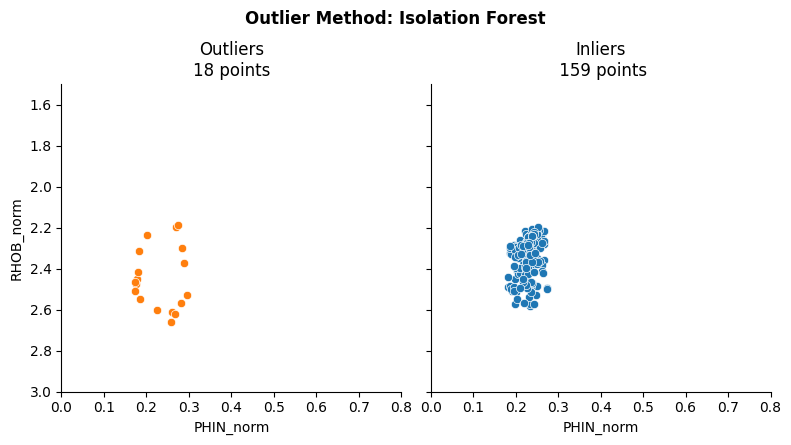

In [33]:
outlier_plot(df, 'Isolation Forest', 'PHIN_norm', 'RHOB_norm', [0, 0.8], [3, 1.5]);

## Building an Isolation Forest Model Using Multiple Features

In [34]:
anomaly_inputs = ['GR_norm', 'PEF', 'PHIA', 'PHIE', 'PHIN_norm', 'RHOB_norm', 'RoMS', 'RT', 'SwIrr', 'SwMS', 'VCL', 'VSH', 'Core_Kmax']

In [36]:
anomaly_inputs = ['GR_norm', 'PEF', 'PHIA', 'PHIE', 'PHIN_norm', 'RHOB_norm', 'RoMS', 'RT', 'SwIrr', 'SwMS', 'VCL', 'VSH', 'Core_Kmax']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


Outlier Method: Isolation Forest
Number of anomalous values 18
Number of non anomalous values  159
Total Number of Values: 177


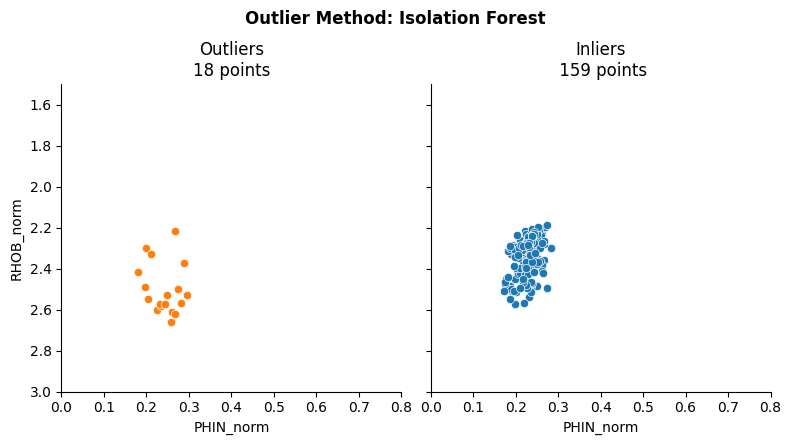

In [37]:
outlier_plot(df, 'Isolation Forest', 'PHIN_norm', 'RHOB_norm', [0, 0.8], [3, 1.5]);

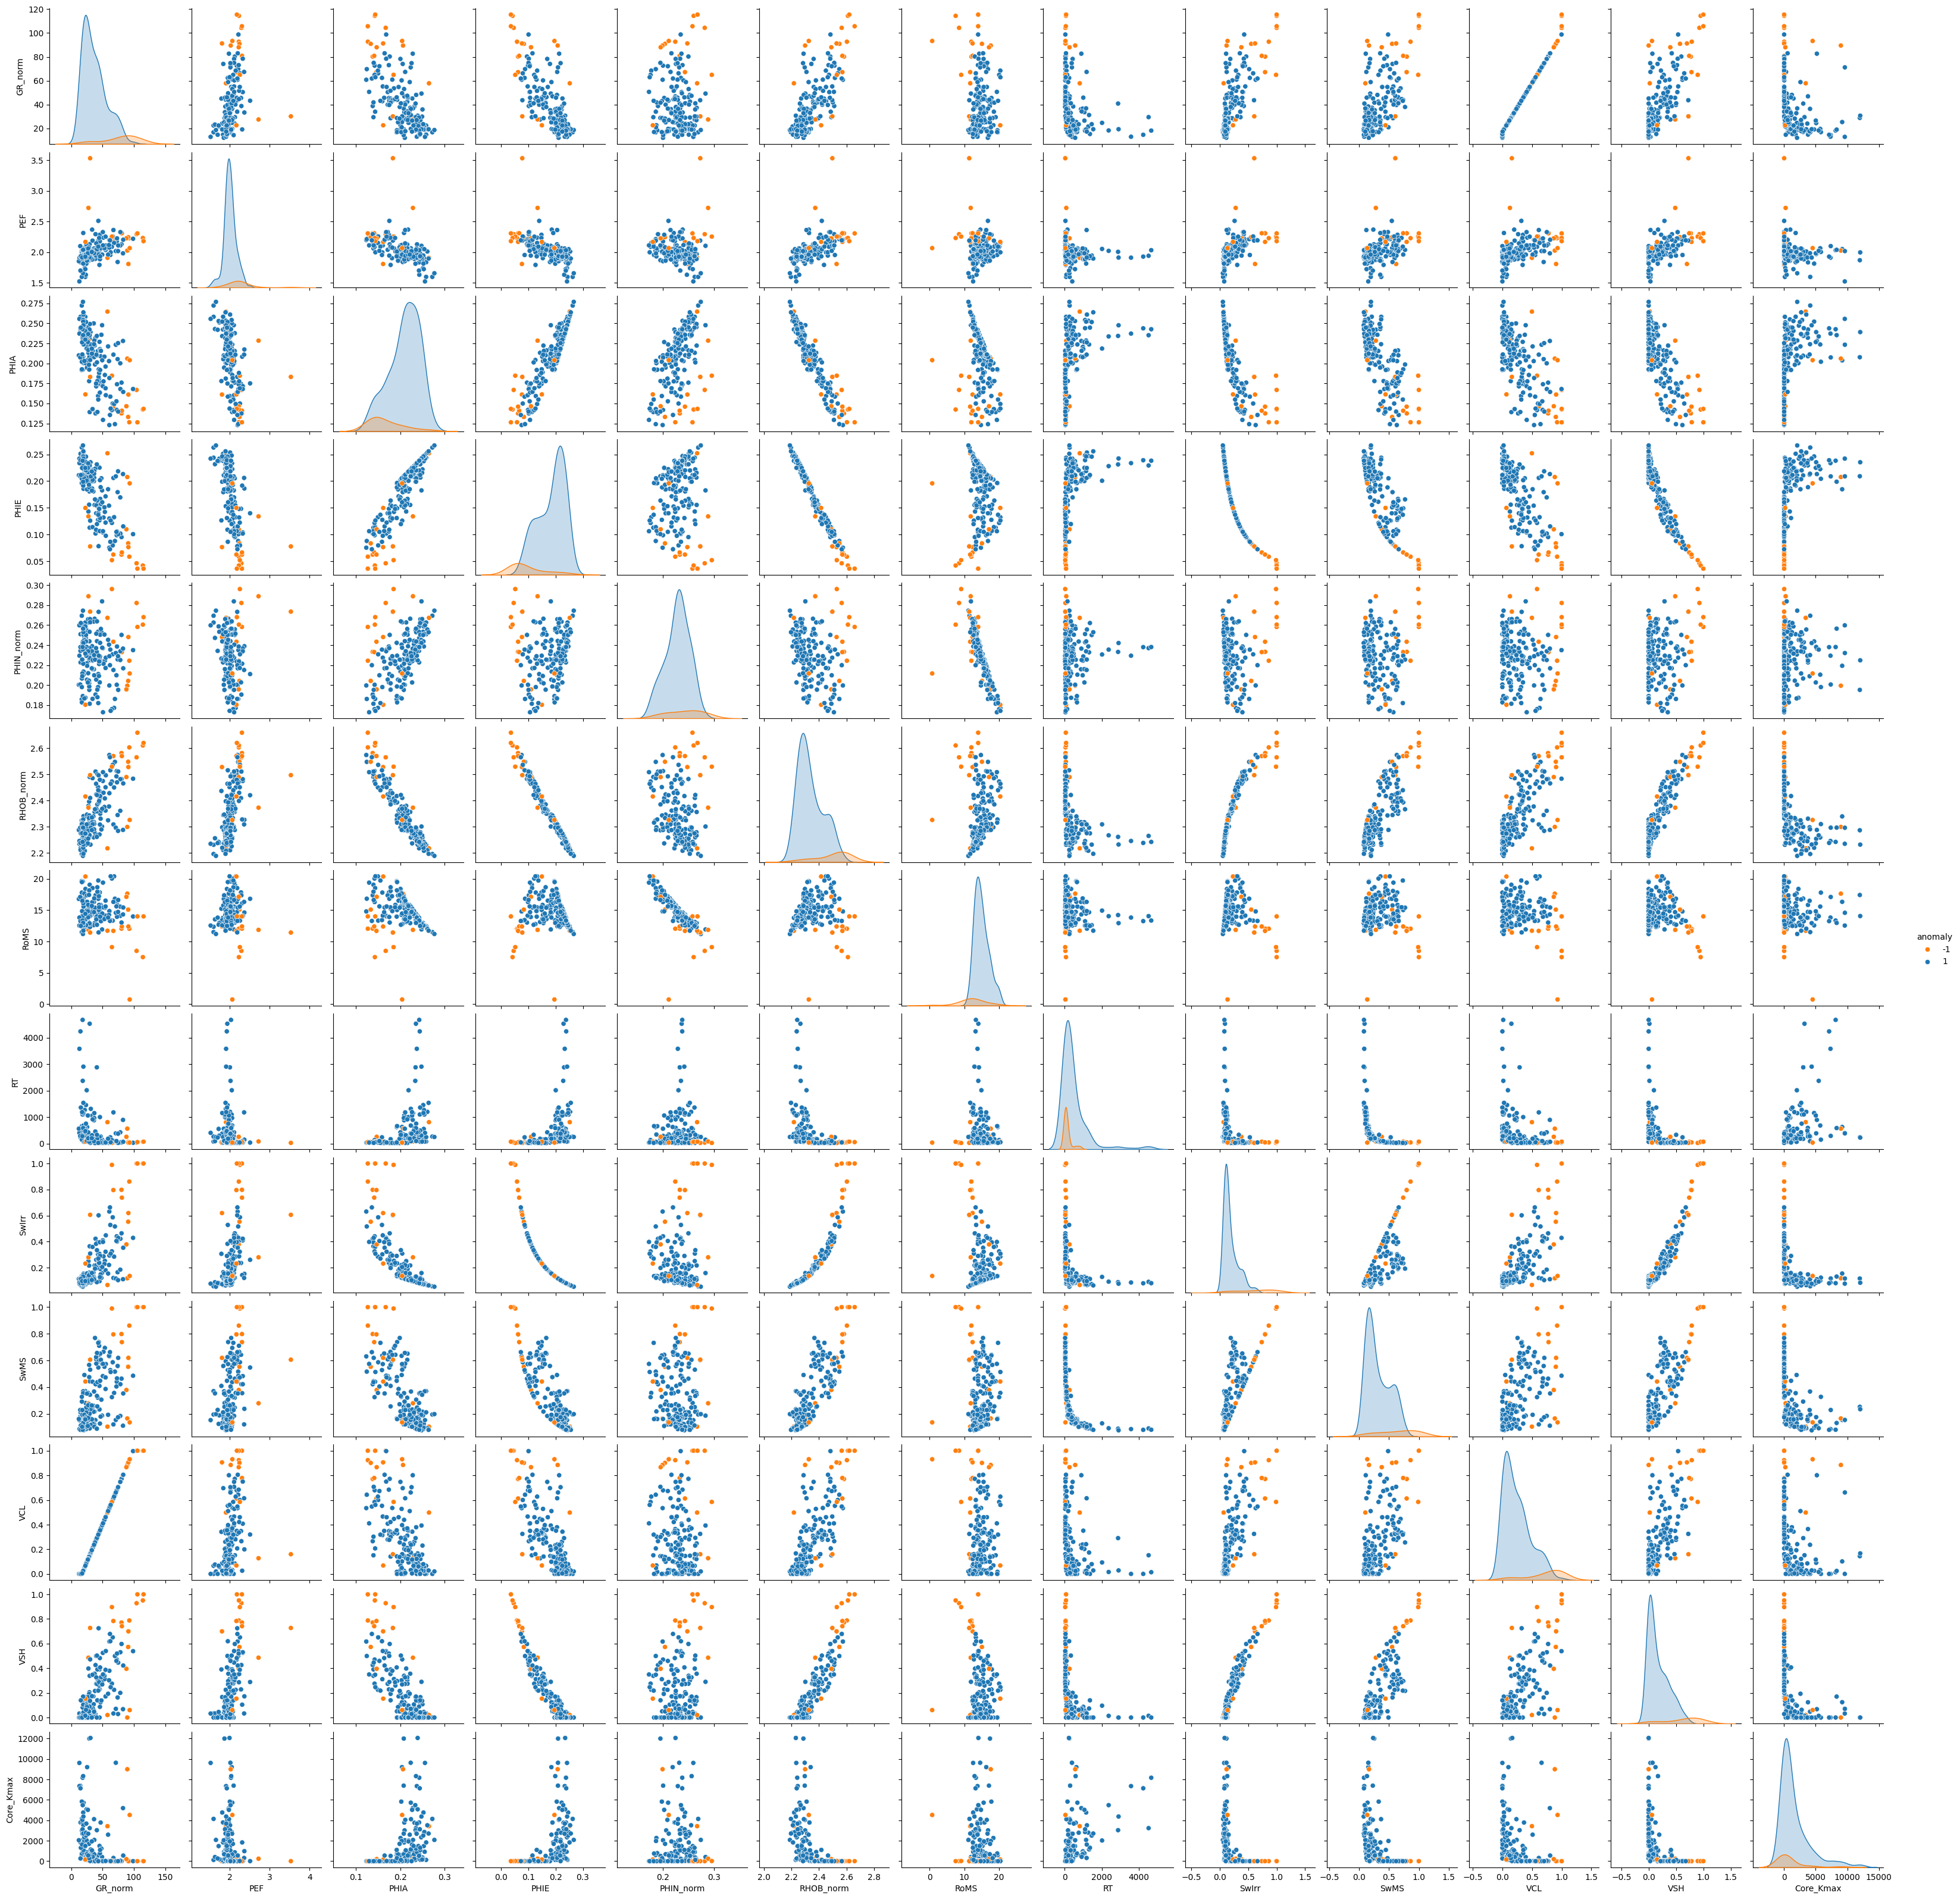

In [38]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)